# VGG 16 Transfer Learning in Keras

### Dataset Link :- https://universe.roboflow.com/universidadde-de-trsosmontes-e-alto-douro/rotten-apples-detection

Dataset Name :- Good & Rotten Apples

### Let's Download the Dataset using Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OW0NGyO0XjTOUAZ7RAiE")
project = rf.workspace("universidadde-de-trsosmontes-e-alto-douro").project("rotten-apples-detection")
version = project.version(5)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rotten-apples-detection-5 in folder:: 100%|██████████| 904/904 [00:00<00:00, 5181.85it/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Setup basic paths
base_dir = '/content/Rotten-apples-detection-5'  # Replace with your path
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')

In [ ]:
# 1. Load and preprocess data
img_size = 224
batch_size = 16

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!cd Rotten-apples-detection-5

In [ ]:
%cd /content/Rotten-apples-detection-5/train

/content/Rotten-apples-detection-5/train


In [ ]:
!ls

'Good Apple'  'Rotten Apple'


In [ ]:
!rm -rf 'Good Apple Rotten Apple'

In [ ]:
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')

Found 777 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_gen.num_classes

2

In [ ]:
# 2. Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze convolutional base

# 3. Add custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='sigmoid')(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 4. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 5. Train model
history = model.fit(train_gen, epochs=5, validation_data=val_gen)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 444ms/step - accuracy: 0.6174 - loss: 1.1098 - val_accuracy: 0.7500 - val_loss: 0.4375
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.7902 - loss: 0.4381 - val_accuracy: 0.9800 - val_loss: 0.1823
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.8279 - loss: 0.3859 - val_accuracy: 0.9800 - val_loss: 0.1250
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.8388 - loss: 0.3695 - val_accuracy: 0.9900 - val_loss: 0.1065
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.8396 - loss: 0.3525 - val_accuracy: 0.9600 - val_loss: 0.1297


In [ ]:
# 6. Evaluate model
loss, acc = model.evaluate(val_gen)
print(f"Test Accuracy: {acc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9597 - loss: 0.1145
Test Accuracy: 0.96


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


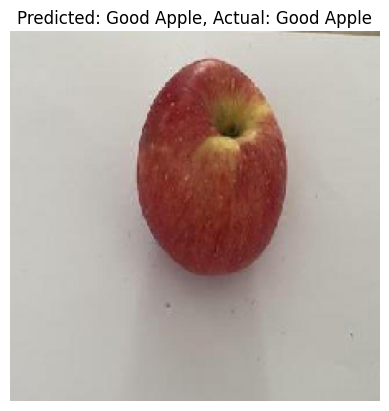

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


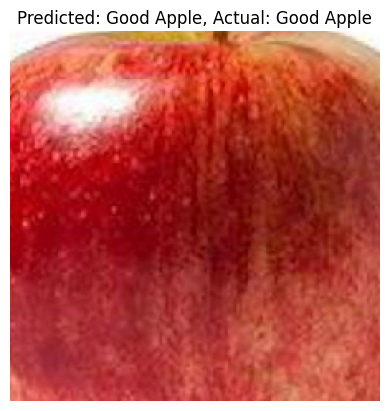

In [ ]:
# 7. Inference: Predict and visualize some test images
class_labels = list(val_gen.class_indices.keys())

def plot_predictions(generator, model, num=5):
    for i in range(num):
        # Use the built-in next() function to get the next batch from the generator
        img, label = next(generator)
        pred = model.predict(img)
        plt.imshow(img[0])
        # Apply np.argmax to the label of the first image in the batch (label[0])
        plt.title(f"Predicted: {class_labels[np.argmax(pred[0])]}, Actual: {class_labels[np.argmax(label[0])]}")
        plt.axis('off')
        plt.show()

plot_predictions(val_gen, model, num=2)